<a href="https://colab.research.google.com/github/ChuquEmeka/Association-Rules/blob/main/Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Identifying Frequently Purchased GroceriesWith Association Rule- Unsuppervised Learning.


####Edeh Emeka N.

[Grocery Dataset](https://www.kaggle.com/irfanasrullah/groceries?select=groceries.csv)

In [8]:
groc <- read.csv("groceries.csv", header = FALSE)
head(groc)

,V1,V2,V3,V4
,<chr>,<chr>,<chr>,<chr>
1,citrus fruit,semi-finished bread,margarine,ready soups
2,tropical fruit,yogurt,coffee,
3,whole milk,,,
4,pip fruit,yogurt,cream cheese,meat spreads
5,other vegetables,whole milk,condensed milk,long life bakery product
6,whole milk,butter,yogurt,rice


In order to create the sparse matrix data structure from the transaction data, i have to use the functionality provided by the **arules** package

In [9]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library("arules")

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [11]:
groceries<-read.transactions("groceries.csv", sep = ",")
groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [12]:
summary(groceries) #to view some basic informations about the transaction matrix

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

In [31]:
inspect(groceries[1:6]) #for the first 6 transactions

    items                      
[1] {citrus fruit,             
     margarine,                
     ready soups,              
     semi-finished bread}      
[2] {coffee,                   
     tropical fruit,           
     yogurt}                   
[3] {whole milk}               
[4] {cream cheese,             
     meat spreads,             
     pip fruit,                
     yogurt}                   
[5] {condensed milk,           
     long life bakery product, 
     other vegetables,         
     whole milk}               
[6] {abrasive cleaner,         
     butter,                   
     rice,                     
     whole milk,               
     yogurt}                   


In [32]:
itemFrequency(groceries[4,2])

artif. sweetener 
               0

####*Visualizing* item support below

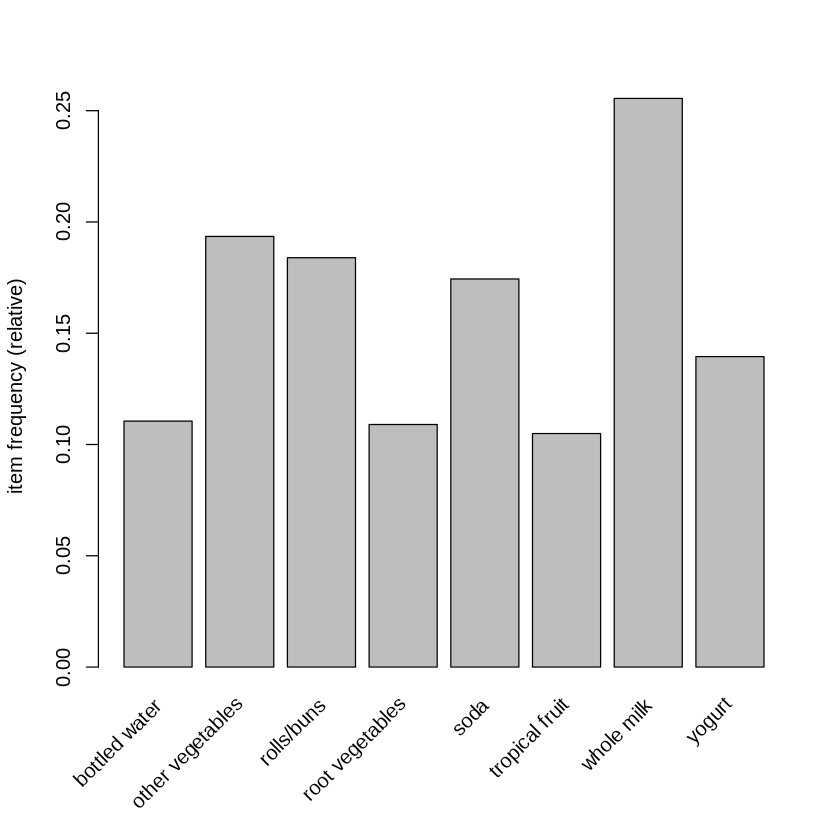

In [39]:
itemFrequencyPlot(groceries, support=0.1)

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

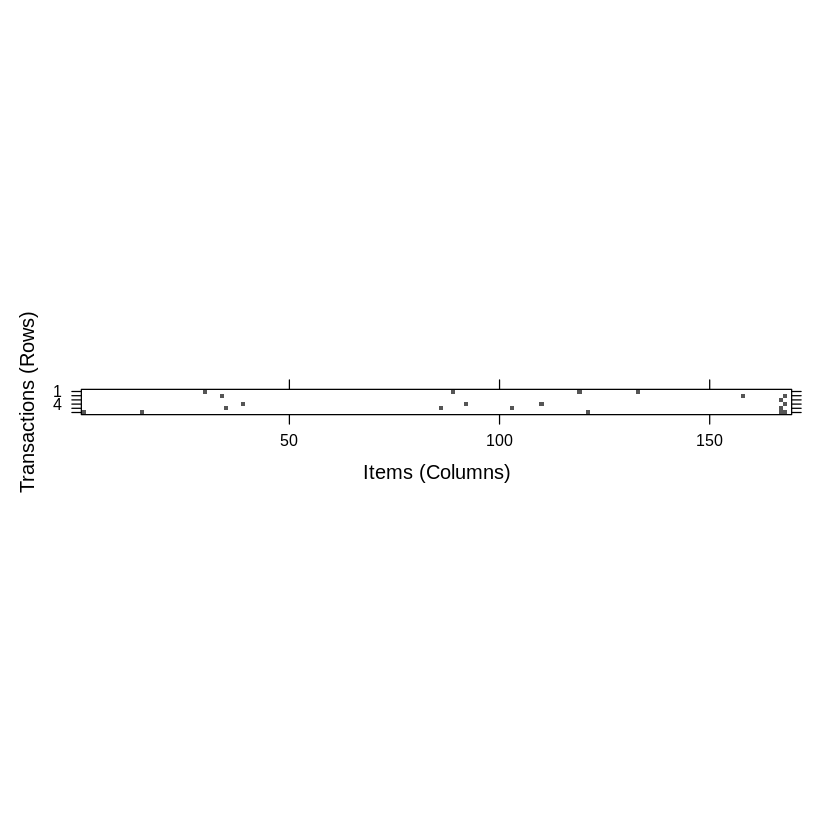

In [42]:
image(groceries[1:6])
sample(groceries)

###Creating A Model to find association between shopping  
###cart items.

####I am going to use the Apriori Algorithm in the Arules   
####for this model

In [45]:
grocrule<-apriori(data = groceries, parameter = list(support = 0.006, confidence
=0.25, minlen=2))
#minlen is set to 2 to eliminate the rules that contain fewer than 2 items


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.006      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 59 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [109 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [463 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [47]:
inspect(grocrule[1:4])

    lhs                rhs                support     confidence coverage  
[1] {potted plants} => {whole milk}       0.006914082 0.4000000  0.01728521
[2] {pasta}         => {whole milk}       0.006100661 0.4054054  0.01504830
[3] {herbs}         => {root vegetables}  0.007015760 0.4312500  0.01626843
[4] {herbs}         => {other vegetables} 0.007727504 0.4750000  0.01626843
    lift     count
[1] 1.565460 68   
[2] 1.586614 60   
[3] 3.956477 69   
[4] 2.454874 76   


In [49]:
summary(grocrule)

set of 463 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 297  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.711   3.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.006101   Min.   :0.2500   Min.   :0.009964   Min.   :0.9932  
 1st Qu.:0.007117   1st Qu.:0.2971   1st Qu.:0.018709   1st Qu.:1.6229  
 Median :0.008744   Median :0.3554   Median :0.024809   Median :1.9332  
 Mean   :0.011539   Mean   :0.3786   Mean   :0.032608   Mean   :2.0351  
 3rd Qu.:0.012303   3rd Qu.:0.4495   3rd Qu.:0.035892   3rd Qu.:2.3565  
 Max.   :0.074835   Max.   :0.6600   Max.   :0.255516   Max.   :3.9565  
     count      
 Min.   : 60.0  
 1st Qu.: 70.0  
 Median : 86.0  
 Mean   :113.5  
 3rd Qu.:121.0  
 Max.   :736.0  

mining info:
      data ntransactions support confidence
 groceries          9835   0.006       0.25
                                                    

In most cases, depending on the objectives of the market,
market basket analysis though, the most useful rules might be the ones with the highest *support*, *confidence* or *lift*. I will now sort the list of rules to reveal the ones with the top ten confidence level. 





In [60]:
top.support <- sort(grocrule, decreasing = TRUE, na.last = NA, by = "confidence")

In [61]:
inspect(head(top.support, 10))

     lhs                     rhs                    support confidence    coverage     lift count
[1]  {butter,                                                                                    
      whipped/sour cream} => {whole milk}       0.006710727  0.6600000 0.010167768 2.583008    66
[2]  {butter,                                                                                    
      yogurt}             => {whole milk}       0.009354347  0.6388889 0.014641586 2.500387    92
[3]  {butter,                                                                                    
      root vegetables}    => {whole milk}       0.008235892  0.6377953 0.012913066 2.496107    81
[4]  {curd,                                                                                      
      tropical fruit}     => {whole milk}       0.006507372  0.6336634 0.010269446 2.479936    64
[5]  {butter,                                                                                    
      tropical fruit

Taking subsets of my Association Rule. I will use the   subset function to search for the subsets of transaction,   items or rules. I will search for rules with "othe vegetables"

In [72]:
othe_veg_rule<-subset(grocrule, items %in% "other vegetables") 
inspect(othe_veg_rule[1:5])

    lhs                     rhs                support     confidence
[1] {herbs}              => {other vegetables} 0.007727504 0.4750000 
[2] {detergent}          => {other vegetables} 0.006405694 0.3333333 
[3] {pickled vegetables} => {other vegetables} 0.006405694 0.3579545 
[4] {baking powder}      => {other vegetables} 0.007320793 0.4137931 
[5] {flour}              => {other vegetables} 0.006304016 0.3625731 
    coverage   lift     count
[1] 0.01626843 2.454874 76   
[2] 0.01921708 1.722719 63   
[3] 0.01789527 1.849965 63   
[4] 0.01769192 2.138547 72   
[5] 0.01738688 1.873834 62   


In [73]:
write(grocrule, file = "groceryrules.csv", sep = ",", quote=TRUE, row.names=FALSE
)

In [74]:
grocery_df<-as(grocrule, "data.frame")

In [82]:
str(grocery_df)

'data.frame':	463 obs. of  6 variables:
 $ rules     : chr  "{potted plants} => {whole milk}" "{pasta} => {whole milk}" "{herbs} => {root vegetables}" "{herbs} => {other vegetables}" ...
 $ support   : num  0.00691 0.0061 0.00702 0.00773 0.00773 ...
 $ confidence: num  0.4 0.405 0.431 0.475 0.475 ...
 $ coverage  : num  0.0173 0.015 0.0163 0.0163 0.0163 ...
 $ lift      : num  1.57 1.59 3.96 2.45 1.86 ...
 $ count     : int  68 60 69 76 76 69 70 67 63 88 ...


In [85]:
head(grocery_df[order(-grocery_df$confidence),])

,rules,support,confidence,coverage,lift,count
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
221,"{butter,whipped/sour cream} => {whole milk}",0.006710727,0.6600000,0.010167768,2.583008,66
229,"{butter,yogurt} => {whole milk}",0.009354347,0.6388889,0.014641586,2.500387,92
225,"{butter,root vegetables} => {whole milk}",0.008235892,0.6377953,0.012913066,2.496107,81
183,"{curd,tropical fruit} => {whole milk}",0.006507372,0.6336634,0.010269446,2.479936,64
222,"{butter,tropical fruit} => {whole milk}",0.006202339,0.6224490,0.009964413,2.436047,61
452,"{other vegetables,tropical fruit,yogurt} => {whole milk}",0.007625826,0.6198347,0.012302999,2.425816,75
